<a href="https://colab.research.google.com/github/AlanFirmino2024/Introducao_a_ciencia_de_dados/blob/main/04-bias-variance-tradeoff-lab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Understanding Bias and Variance Tradeoff


## 1. Introduction
In this notebook, we will explore the concepts of bias and variance, which are crucial in understanding the performance of machine learning models. We will demonstrate these concepts using synthetic data, simple linear regression models, and cross-validation.

## 2. Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from mlxtend.evaluate import bias_variance_decomp

## 3. Creating Synthetic Data

In [2]:
# Function to generate synthetic data
def generate_synthetic_data(n_samples=100, noise=1.0, random_seed=42):
    np.random.seed(random_seed)
    X = np.linspace(0, 100, n_samples).reshape(-1, 1)
    true_function = -0.0001 * X**3 + 0.01 * X**2 + 0.1 * X + 1
    y = true_function + np.random.normal(scale=noise, size=X.shape)
    return X, y, true_function

# Generate synthetic data
X, y, true_function = generate_synthetic_data(n_samples=100, noise=2.0)

In [3]:
# Splitting data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## 4. Simple Linear Regression Model

In [4]:
# Training a simple linear regression model
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

# Predictions
y_train_pred = lin_reg.predict(X_train)
y_test_pred = lin_reg.predict(X_test)

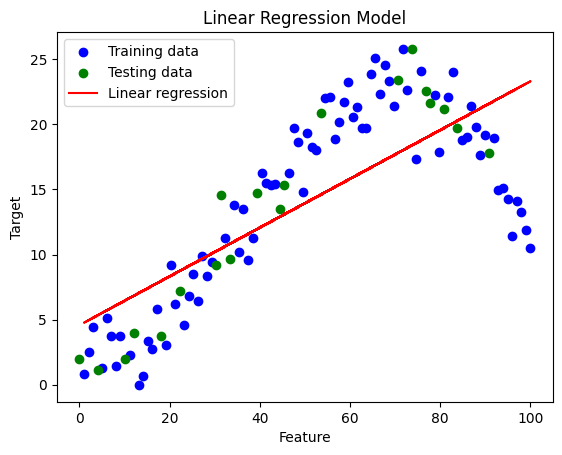

In [5]:
# Plotting the results
plt.scatter(X_train, y_train, color='blue', label='Training data')
plt.scatter(X_test, y_test, color='green', label='Testing data')
plt.plot(X_train, y_train_pred, color='red', label='Linear regression')
plt.xlabel('Feature')
plt.ylabel('Target')
plt.title('Linear Regression Model')
plt.legend()
plt.show()

In [6]:
# Calculating training and testing errors
train_error = mean_squared_error(y_train, y_train_pred)
test_error = mean_squared_error(y_test, y_test_pred)
print(f'Training Error: {train_error}')
print(f'Testing Error: {test_error}')

Training Error: 24.57401812781828
Testing Error: 13.402241249399026


In this case, why training MSE is greater than test MSE?

## 5. Polynomial Regression Models

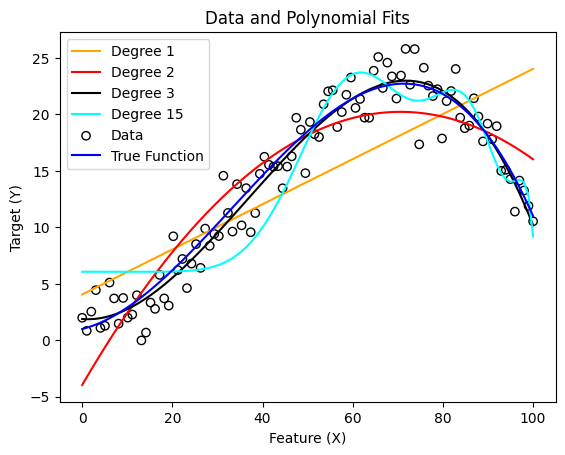

In [7]:
# Fit and plot polynomial models of different degrees
degrees = [1, 2, 3, 15]
colors = ['orange', 'red', 'black', 'cyan']
predictions = []

for degree, color in zip(degrees, colors):
    poly_features = PolynomialFeatures(degree=degree, include_bias=False)
    X_poly = poly_features.fit_transform(X)
    model = LinearRegression()
    model.fit(X_poly, y)
    y_poly_pred = model.predict(X_poly)
    predictions.append(y_poly_pred)
    plt.plot(X, y_poly_pred, label=f'Degree {degree}', color=color)

# Plot the synthetic data and the true function
plt.scatter(X, y, facecolors='none', edgecolors='black', label='Data')
plt.plot(X, true_function, label='True Function', color='blue')
plt.xlabel('Feature (X)')
plt.ylabel('Target (Y)')
plt.title('Data and Polynomial Fits')
plt.legend()
plt.show()

## 6. Bias-Variance Tradeoff

The bias-variance tradeoff is a fundamental concept in machine learning. It describes the tradeoff between two sources of error that affect the performance of a model:

- **Bias**: Error due to overly simplistic assumptions in the learning algorithm. High bias can cause the model to miss the relevant relations between features and target outputs (underfitting).
- **Variance**: Error due to too much complexity in the learning algorithm. High variance can cause the model to model the random noise in the training data (overfitting).

To visualize the bias-variance tradeoff, we can plot the training and testing errors for models of varying complexity.

In [ ]:
# Calculate and plot training and test MSE
train_errors = []
test_errors = []
flexibility = []
bias_errors = []
variance_errors = []

for degree in range(1, 21):
    poly_features = PolynomialFeatures(degree=degree, include_bias=False)
    X_train_poly = poly_features.fit_transform(X_train)
    X_test_poly = poly_features.fit_transform(X_test)

    model = LinearRegression()
    model.fit(X_train_poly, y_train)

    y_train_pred = model.predict(X_train_poly)
    y_test_pred = model.predict(X_test_poly)

    train_errors.append(mean_squared_error(y_train, y_train_pred))
    test_errors.append(mean_squared_error(y_test, y_test_pred))
    flexibility.append(degree)

    # Calculate bias and variance using mlxtend
    mse, bias, variance = bias_variance_decomp(model, X_train_poly, y_train.flatten(), X_test_poly, y_test.flatten(),
                                               loss='mse', num_rounds=200, random_seed=42)
    bias_errors.append(bias**2)
    variance_errors.append(variance)

plt.plot(flexibility, train_errors, label='Training MSE', color='gray', marker='o')
plt.plot(flexibility, test_errors, label='Test MSE', color='red', marker='o')
plt.xlabel('Flexibility (Polynomial Degree)')
plt.ylabel('Error')
plt.title('Bias-Variance Tradeoff')
plt.xticks(flexibility)  # Show integer values of degrees on the x-axis
plt.legend()
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.show()

In [ ]:
# Plot bias, variance, and MSE
plt.plot(flexibility, bias_errors, label='Squared Bias', color='blue', marker='o')
plt.plot(flexibility, variance_errors, label='Variance', color='green', marker='o')
plt.plot(flexibility, np.array(bias_errors) + np.array(variance_errors), label='MSE', color='red', marker='o')
plt.xlabel('Flexibility (Polynomial Degree)')
plt.ylabel('Error')
plt.title('Bias, Variance, and MSE')
plt.xticks(flexibility)  # Show integer values of degrees on the x-axis
plt.legend()
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.show()

## 7. Conclusion

In this notebook, we explored the concepts of bias and variance and demonstrated how they affect the performance of machine learning models. We trained linear and polynomial regression models on synthetic data and visualized the bias-variance tradeoff.

Understanding and managing the bias-variance tradeoff is crucial for building models that generalize well to new, unseen data. By balancing bias and variance, we can achieve better performance and more reliable predictions.